In [1]:
import pandas as pd
import numpy as np

In [2]:
vacuums = pd.read_csv('../inputCSVs/vacuums.csv')

In [3]:
vacuums.shape

(68166, 4)

In [4]:
# Check the missing values in df
null_values=vacuums.isna().sum()


In [5]:
null_values

Unnamed: 0    0
product_Id    0
rating        0
reviews       0
dtype: int64

In [6]:
vacuums.shape

(68166, 4)

In [7]:
!pip3 install gensim
!pip3 install pyldavis
!pip3 install nltk
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install textblob
!pip3 install spacy
!python3 -m spacy download en 

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samridhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
pd.set_option("display.max_colwidth", 200)
import re
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
%matplotlib inline

In [10]:
# a function that provides the most frequent words with count on a plot
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  print(d)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [11]:
vacuums['reviews']

0        Ok , this is what I get for trying to save a few bucks .I thought that this vacuum , being a Hoover , would be just what I needed , a small , powerful , inexpensive vac .I live in Italy and have a...
1        This little vacuum is not useful if there is hair -LRB- human -RRB- spread on the carpet .We have to manually remove the hair after vacuuming .Not only that , the accessories do not serve the purp...
2        I received this item last year as a Christmas gift .I had specifically asked for this electric broom since I had done some research on-line and this one sounded the best .I have five pugs and they...
3        This was easy to assemble , is n't that noisy and is easy to manuver .It works great on hardfloors but is terrible on carpeting .I have 2 dogs -LRB- 1 is a collie with real long fur -RRB- .It just...
4        Do not buy this product for rugs or thick carpet .It simply does not do well there .However , I do recommend it for floors and short carpet .Mine was bough

       word   count
44      the  480340
1         ,  332815
59       it  279242
31      and  276076
9        to  268122
11        a  248264
5         I  213462
3        is  168707
48       of  131201
17   vacuum  107797
7       for  107322
16     that  106727
2      this  105499
14       .I  104256
32     have   93826
50       on   84680
29       in   81645
132       .   76401
226    with   74663
251      my   73409
61      was   69370
127     you   68443
155     n't   67523
87      but   64539
93      not   63406
103      up   60487
201    .The   56436
222     .It   55126
230      's   52669
203      so   48192


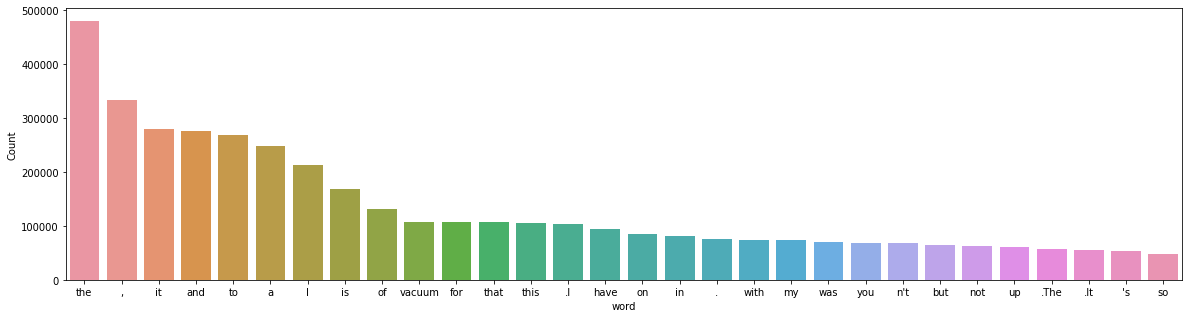

In [12]:
freq_words(vacuums['reviews'])

In [13]:
# replace "n't" with " not"
vacuums['reviews']= vacuums['reviews'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
vacuums['reviews'] = vacuums['reviews'].str.replace("[^a-zA-Z#]", " ")

/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1937/3944171286.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  vacuums['reviews'] = vacuums['reviews'].str.replace("[^a-zA-Z#]", " ")


In [14]:
vacuums['reviews']

0        Ok   this is what I get for trying to save a few bucks  I thought that this vacuum   being a Hoover   would be just what I needed   a small   powerful   inexpensive vac  I live in Italy and have a...
1        This little vacuum is not useful if there is hair  LRB  human  RRB  spread on the carpet  We have to manually remove the hair after vacuuming  Not only that   the accessories do not serve the purp...
2        I received this item last year as a Christmas gift  I had specifically asked for this electric broom since I had done some research on line and this one sounded the best  I have five pugs and they...
3        This was easy to assemble   is  not that noisy and is easy to manuver  It works great on hardfloors but is terrible on carpeting  I have   dogs  LRB    is a collie with real long fur  RRB   It jus...
4        Do not buy this product for rugs or thick carpet  It simply does not do well there  However   I do recommend it for floors and short carpet  Mine was bough

       word   count
42      the  480650
4         I  329640
57       it  279486
29      and  276645
8        to  268837
10        a  248477
2        is  168739
46       of  131376
90      not  131046
15   vacuum  108159
6       for  107360
14     that  106745
1      this  105538
30     have   93869
48       on   86532
27       in   82921
216    with   74682
241      my   73428
59      was   69381
124     you   68511
192     The   68279
84      but   64583
212      It   64210
100      up   61674
220       s   53342
194      so   48587
145      as   46035
132     RRB   43771
49      one   43039
19       be   40643


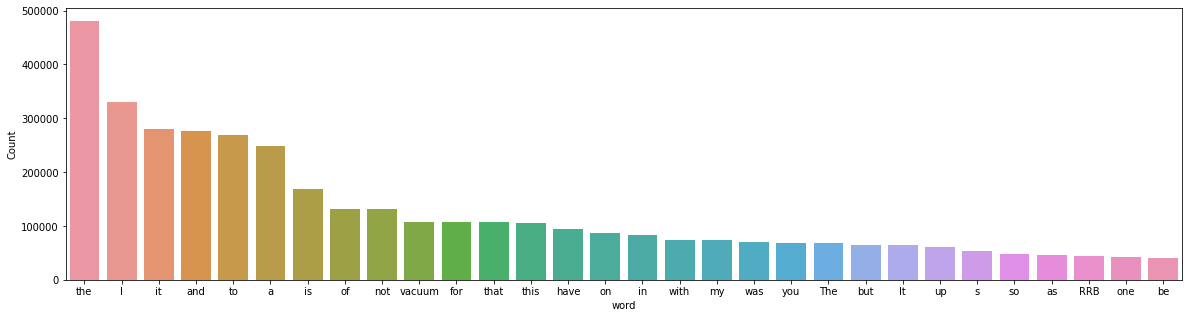

In [15]:
freq_words(vacuums['reviews'])

#### Checking stopwords in the reviews

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [17]:
# Checking the number of stopwords in each review
vacuums['stopwords'] = vacuums['reviews'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
vacuums[['reviews','stopwords']].head()

,reviews,stopwords
0,Ok this is what I get for trying to save a few bucks I thought that this vacuum being a Hoover would be just what I needed a small powerful inexpensive vac I live in Italy and have a...,88
1,This little vacuum is not useful if there is hair LRB human RRB spread on the carpet We have to manually remove the hair after vacuuming Not only that the accessories do not serve the purp...,25
2,I received this item last year as a Christmas gift I had specifically asked for this electric broom since I had done some research on line and this one sounded the best I have five pugs and they...,170
3,This was easy to assemble is not that noisy and is easy to manuver It works great on hardfloors but is terrible on carpeting I have dogs LRB is a collie with real long fur RRB It jus...,76
4,Do not buy this product for rugs or thick carpet It simply does not do well there However I do recommend it for floors and short carpet Mine was bought for quick cleanup at my computer consul...,99


In [18]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [19]:
vacuums['reviews']

0        Ok   this is what I get for trying to save a few bucks  I thought that this vacuum   being a Hoover   would be just what I needed   a small   powerful   inexpensive vac  I live in Italy and have a...
1        This little vacuum is not useful if there is hair  LRB  human  RRB  spread on the carpet  We have to manually remove the hair after vacuuming  Not only that   the accessories do not serve the purp...
2        I received this item last year as a Christmas gift  I had specifically asked for this electric broom since I had done some research on line and this one sounded the best  I have five pugs and they...
3        This was easy to assemble   is  not that noisy and is easy to manuver  It works great on hardfloors but is terrible on carpeting  I have   dogs  LRB    is a collie with real long fur  RRB   It jus...
4        Do not buy this product for rugs or thick carpet  It simply does not do well there  However   I do recommend it for floors and short carpet  Mine was bough

#### Checking punctuation present in the reviews

In [20]:
import string
nltk.download('punkt')
def count_punctuation(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

vacuums['punctuation'] = vacuums['reviews'].apply(lambda x: count_punctuation(x))


[nltk_data] Downloading package punkt to /Users/samridhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
vacuums[['reviews','punctuation']]

,reviews,punctuation
0,Ok this is what I get for trying to save a few bucks I thought that this vacuum being a Hoover would be just what I needed a small powerful inexpensive vac I live in Italy and have a...,0
1,This little vacuum is not useful if there is hair LRB human RRB spread on the carpet We have to manually remove the hair after vacuuming Not only that the accessories do not serve the purp...,0
2,I received this item last year as a Christmas gift I had specifically asked for this electric broom since I had done some research on line and this one sounded the best I have five pugs and they...,0
3,This was easy to assemble is not that noisy and is easy to manuver It works great on hardfloors but is terrible on carpeting I have dogs LRB is a collie with real long fur RRB It jus...,0
4,Do not buy this product for rugs or thick carpet It simply does not do well there However I do recommend it for floors and short carpet Mine was bought for quick cleanup at my computer consul...,0
...,...,...
68161,It s a good machine with decent quality Does a good job with corners and picks up hair really well but the problem is that hair sometime wraps around the brush which requires you to remove it ...,0
68162,I have had two models of Roomba prior to purchasing the Bobsweep Bob definitely cleans better than the but I still like my Roomba more even though it does not mop The battery on the Bobs...,3
68163,Even though on bob sweep # s website it says that bob is not a gadget from my experience bob is a cool gadget that HELPS with cleaning but does not replace manual cleaning I run him alm...,4
68164,The bobsweep vacuums mops and sterilizes my floors all with one sweep across the floor When I first read about it I thought maybe they are just good at advertising it as a super vacuum B...,0


#### Checking hastags present in the review text

In [22]:
vacuums['hastags'] = vacuums['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
vacuums['hastags'].sum()

8216

In [23]:
vacuums.hastags.loc[vacuums.hastags != 0].count()

2995

#### Checking numerics from the reviews

In [24]:
vacuums['numerics'] = vacuums['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
vacuums['numerics'].sum()

0

#### Checking the words which are in uppercase, which may be significant

In [25]:
vacuums['upper'] = vacuums['reviews'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
vacuums['reviews'][vacuums['upper'] > 1].count()

55015

In [26]:
vacuums['reviews']

0        Ok   this is what I get for trying to save a few bucks  I thought that this vacuum   being a Hoover   would be just what I needed   a small   powerful   inexpensive vac  I live in Italy and have a...
1        This little vacuum is not useful if there is hair  LRB  human  RRB  spread on the carpet  We have to manually remove the hair after vacuuming  Not only that   the accessories do not serve the purp...
2        I received this item last year as a Christmas gift  I had specifically asked for this electric broom since I had done some research on line and this one sounded the best  I have five pugs and they...
3        This was easy to assemble   is  not that noisy and is easy to manuver  It works great on hardfloors but is terrible on carpeting  I have   dogs  LRB    is a collie with real long fur  RRB   It jus...
4        Do not buy this product for rugs or thick carpet  It simply does not do well there  However   I do recommend it for floors and short carpet  Mine was bough

#### Cleaning steps

In [27]:


# remove short words whose (length < 3)
vacuums['reviews'] = vacuums['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# removing puctuations
vacuums['reviews'] = vacuums['reviews'].str.replace('[^\w\s]','')
vacuums['reviews'].head()

# make entire review text lowercase
reviews = [r.lower() for r in vacuums['reviews']]

# remove stopwords from the reviews
reviews = [remove_stopwords(r.split()) for r in reviews]




<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1937/4181763801.py:5: DeprecationWarning: invalid escape sequence \w
  vacuums['reviews'] = vacuums['reviews'].str.replace('[^\w\s]','')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1937/4181763801.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  vacuums['reviews'] = vacuums['reviews'].str.replace('[^\w\s]','')


In [28]:
vacuums['reviews']

0        this what get for trying save few bucks thought that this vacuum being Hoover would just what needed small powerful inexpensive vac live Italy and have all marble floors except for ONE area rug Th...
1        This little vacuum not useful there hair LRB human RRB spread the carpet have manually remove the hair after vacuuming Not only that the accessories not serve the purpose the hose very short not r...
2        received this item last year Christmas gift had specifically asked for this electric broom since had done some research line and this one sounded the best have five pugs and they shed days year So...
3        This was easy assemble not that noisy and easy manuver works great hardfloors but terrible carpeting have dogs LRB collie with real long fur RRB just pushed the fur around carpets did anything all...
4        not buy this product for rugs thick carpet simply does not well there However recommend for floors and short carpet Mine was bought for quick cleanup compu

          word   count
5       vacuum  111570
18         one   45983
89         rrb   43771
87         lrb   39639
126        use   38535
7        would   36028
31       great   32287
60        like   30624
0          get   29134
27        well   28422
260      clean   28379
330       good   26702
542    suction   26550
47        hair   25461
91      carpet   24873
204       time   24693
65        dirt   23806
125       easy   23714
160      floor   21208
52        much   21198
237     really   20629
43      little   20061
415   cleaning   19890
16      floors   19612
161       also   19069
347       dust   18711
1304     dyson   17721
188      brush   17029
131       used   17000
98        hose   16980
366      power   16924
315       back   16903
12         vac   16662
218      works   16343
230     bought   16277


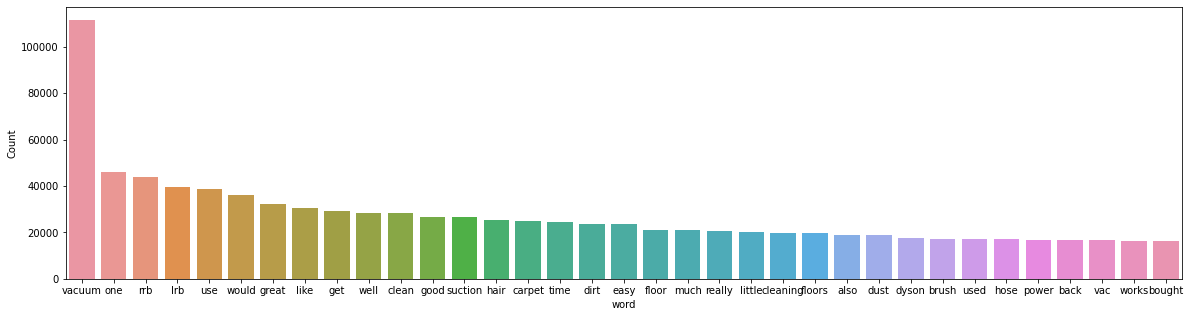

In [29]:
freq_words(reviews, 35)

In [30]:
# !pip3 install -U spacy
# !python3 -m spacy download en 
import spacy
# en_core_web_sm

In [31]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


In [32]:
import pandas as pd
stemmer = SnowballStemmer("english")
# reviews_3 = [stemmer.stem(plural) for plural in original_words]

def stemming_and_lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [33]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['little', 'vacuum', 'useful', 'hair', 'lrb', 'human', 'rrb', 'spread', 'carpet', 'manually', 'remove', 'hair', 'vacuuming', 'accessories', 'serve', 'purpose', 'hose', 'short', 'recommend', 'product', 'anybody']


In [34]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['little', 'vacuum', 'useful', 'hair', 'lrb', 'human', 'rrb', 'spread', 'carpet', 'manually', 'remove', 'hair', 'vacuuming', 'accessories', 'serve', 'purpose', 'hose', 'short', 'recommend', 'product', 'anybody']


21

In [35]:
reviews_2 = stemming_and_lemmatization(tokenized_reviews)
print(reviews_2[1])

['little', 'vacuum', 'useful', 'hair', 'human', 'rrb', 'carpet', 'hair', 'accessory', 'purpose', 'hose', 'short', 'recommend', 'product']


In [36]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'accessories',
 'anybody',
 'lrb',
 'manually',
 'remove',
 'serve',
 'spread',
 'vacuuming'}

In [37]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
vacuums['reviews'] = reviews_3

            word   count
17        vacuum  101564
8          floor   40503
140        clean   36991
110         time   32784
58          good   32444
67         great   31136
43        carpet   29887
304      suction   26252
23          hair   25841
62          easy   23096
63           use   23070
33          dirt   21989
52          year   21908
42           rrb   19922
31         brush   19808
18         thing   19749
19        little   18993
2          small   18150
192         dust   18088
715        dyson   16943
206        power   16836
69    attachment   16677
94        filter   16418
112          job   16238
49       product   16182
1188     battery   14772
244         cord   14762
111          new   14663
46          hose   14400
370          old   13936
103        month   13847
187         work   13847
271     canister   13737
265      machine   13472
82          unit   13255


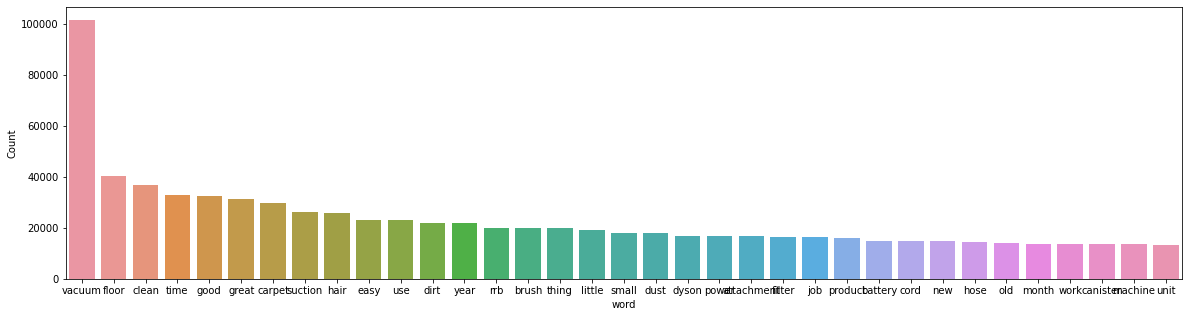

In [38]:
freq_words(vacuums['reviews'], 35)

#### Removing any URLs in the reviews

In [39]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)



# remove all urls from df
import re
import string

vacuums['reviews'] = vacuums['reviews'].apply(lambda x: remove_url(x))

#### Removing html tags from the text

In [40]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)



# remove all html tags from df
vacuums['reviews'] = vacuums['reviews'].apply(lambda x: remove_html(x))

#### Removing emojis and emoticons

In [41]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



# remove all emojis from df
vacuums['reviews'] = vacuums['reviews'].apply(lambda x: remove_emoji(x))

In [42]:
# !pip3 install emot
import emot
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
    return emoticon_pattern.sub(r'', text)



# vacuums['reviews'] = vacuums['reviews'].apply(lambda x: remove_emoticons(x))

<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \|
<>:7: DeprecationWarning: invalid escape sequence \)
<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \|
<>:7: DeprecationWarning: invalid escape sequence \)
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1937/3515977610.py:7: DeprecationWarning: invalid escape sequence \(
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1937/3515977610.py:7: DeprecationWarning: invalid escape sequence \|
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1937/3515977610.py:7: DeprecationWarning: invalid escape sequence \)
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')


In [43]:
# correction of the words spelling - not done at it is taking  lot of time to run
# from textblob import TextBlob
# vacuums['reviews'].apply(lambda x: str(TextBlob(x).correct()))

            word   count
17        vacuum  101564
8          floor   40503
140        clean   36991
110         time   32784
58          good   32444
67         great   31136
43        carpet   29887
304      suction   26252
23          hair   25841
62          easy   23096
63           use   23070
33          dirt   21989
52          year   21908
42           rrb   19922
31         brush   19808
18         thing   19749
19        little   18993
2          small   18150
192         dust   18088
715        dyson   16943
206        power   16836
69    attachment   16677
94        filter   16418
112          job   16238
49       product   16182
1188     battery   14772
244         cord   14762
111          new   14663
46          hose   14400
370          old   13936


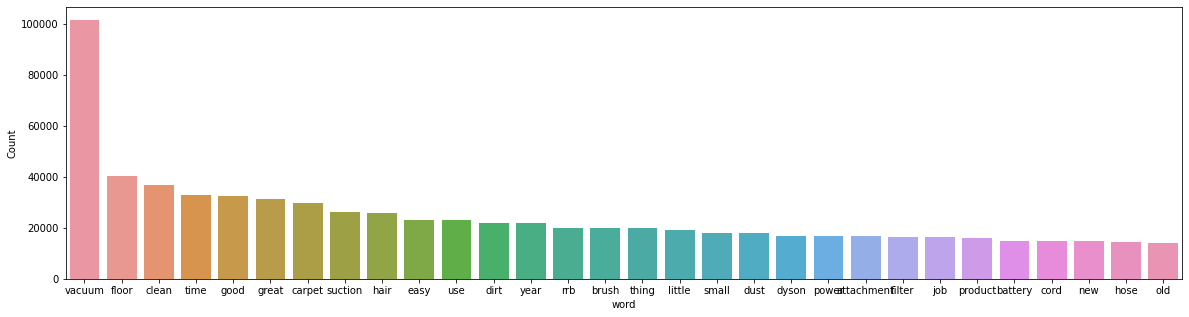

In [44]:
freq_words(vacuums['reviews'])

In [45]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

<>:4: DeprecationWarning: invalid escape sequence \[
<>:6: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \[
<>:6: DeprecationWarning: invalid escape sequence \w
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1937/2170350517.py:4: DeprecationWarning: invalid escape sequence \[
  text = re.sub('\[.*?\]', '', text)
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1937/2170350517.py:6: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*', '', text)


In [46]:


vacuums['reviews'] = vacuums['reviews'].apply(round1)
vacuums['reviews']



0        buck hoover small powerful inexpensive vac live marble floor area perfect jobwhy alot money rug quick vac ready vacuum quick vac thing little piece paper cat hair much amount hoover terrible think...
1                                                                                                                 little vacuum useful hair human rrb carpet hair accessory purpose hose short recommend product
2        item last year gift electric broom research line good pug day year day pug frustrating hair easy use vacuum central vac system house product great easy use frustrated hose attachment inconvenient ...
3        noisy easy great hardfloor terrible carpeting dog real long fur rrb fur carpet hose small clump carpet quick supplement real vacuum store speak unfortunate great little vac floor next hardfloor gr...
4        product thick carpet floor short carpet mine quick cleanup computer consulting business shredder soil plant carpet tool clean light small closet quick vac 

            word   count
17        vacuum  101564
8          floor   40503
140        clean   36991
110         time   32784
58          good   32444
67         great   31136
43        carpet   29887
304      suction   26252
23          hair   25841
62          easy   23096
63           use   23070
33          dirt   21989
52          year   21908
42           rrb   19922
31         brush   19808
18         thing   19749
19        little   18993
2          small   18150
192         dust   18088
715        dyson   16943
206        power   16836
69    attachment   16677
94        filter   16418
112          job   16238
49       product   16182
1188     battery   14772
244         cord   14762
111          new   14663
46          hose   14400
370          old   13936


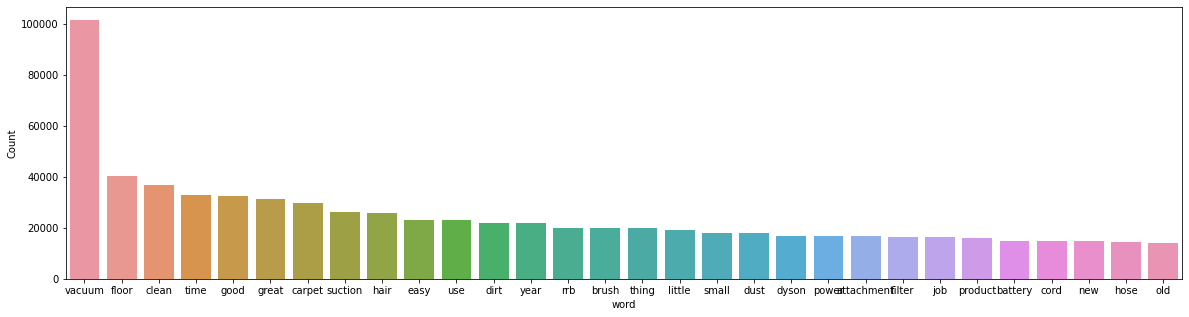

In [47]:
freq_words(vacuums['reviews'])

In [48]:


# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)



In [49]:


vacuums['reviews'] = vacuums['reviews'].apply(round2)
vacuums['reviews']



0        buck hoover small powerful inexpensive vac live marble floor area perfect jobwhy alot money rug quick vac ready vacuum quick vac thing little piece paper cat hair much amount hoover terrible think...
1                                                                                                                 little vacuum useful hair human rrb carpet hair accessory purpose hose short recommend product
2        item last year gift electric broom research line good pug day year day pug frustrating hair easy use vacuum central vac system house product great easy use frustrated hose attachment inconvenient ...
3        noisy easy great hardfloor terrible carpeting dog real long fur rrb fur carpet hose small clump carpet quick supplement real vacuum store speak unfortunate great little vac floor next hardfloor gr...
4        product thick carpet floor short carpet mine quick cleanup computer consulting business shredder soil plant carpet tool clean light small closet quick vac 

In [50]:
vacuums['word_count'] = vacuums['reviews'].apply(lambda x: len(str(x).split(" ")))
vacuums[['reviews','word_count']].head()

,reviews,word_count
0,buck hoover small powerful inexpensive vac live marble floor area perfect jobwhy alot money rug quick vac ready vacuum quick vac thing little piece paper cat hair much amount hoover terrible think...,52
1,little vacuum useful hair human rrb carpet hair accessory purpose hose short recommend product,14
2,item last year gift electric broom research line good pug day year day pug frustrating hair easy use vacuum central vac system house product great easy use frustrated hose attachment inconvenient ...,96
3,noisy easy great hardfloor terrible carpeting dog real long fur rrb fur carpet hose small clump carpet quick supplement real vacuum store speak unfortunate great little vac floor next hardfloor gr...,35
4,product thick carpet floor short carpet mine quick cleanup computer consulting business shredder soil plant carpet tool clean light small closet quick vac job well construction attractive sturdy l...,62


            word   count
17        vacuum  101564
8          floor   40503
140        clean   36991
110         time   32784
58          good   32444
67         great   31136
43        carpet   29887
304      suction   26252
23          hair   25841
62          easy   23096
63           use   23070
33          dirt   21989
52          year   21908
42           rrb   19922
31         brush   19808
18         thing   19749
19        little   18993
2          small   18150
192         dust   18088
715        dyson   16943
206        power   16836
69    attachment   16677
94        filter   16418
112          job   16238
49       product   16182
1188     battery   14772
244         cord   14762
111          new   14663
46          hose   14400
370          old   13936


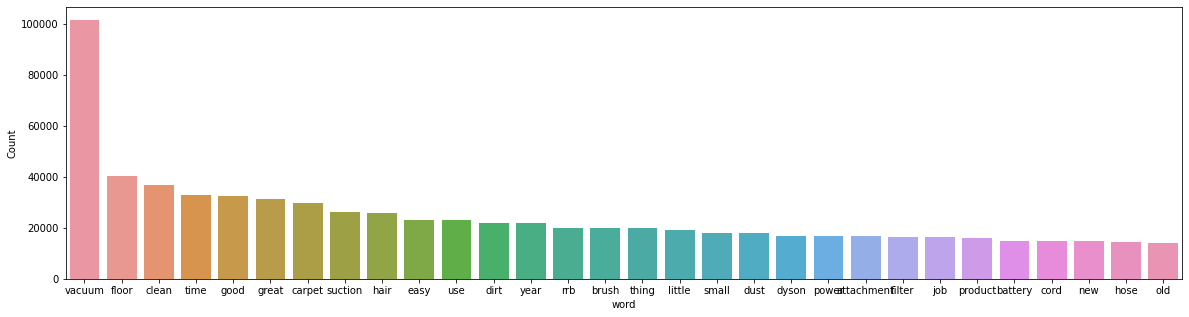

In [51]:
freq_words(vacuums['reviews'])

In [52]:
vacuums.to_csv('vacuums_processed.csv')

In [53]:
vacuums

,Unnamed: 0,product_Id,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count
0,0,B00002NC62-0000,0,buck hoover small powerful inexpensive vac live marble floor area perfect jobwhy alot money rug quick vac ready vacuum quick vac thing little piece paper cat hair much amount hoover terrible think...,88,0,0,0,16,52
1,1,B00002NC62-0001,0,little vacuum useful hair human rrb carpet hair accessory purpose hose short recommend product,25,0,0,0,3,14
2,2,B00002NC62-0002,1,item last year gift electric broom research line good pug day year day pug frustrating hair easy use vacuum central vac system house product great easy use frustrated hose attachment inconvenient ...,170,0,0,0,17,96
3,3,B00002NC62-0003,1,noisy easy great hardfloor terrible carpeting dog real long fur rrb fur carpet hose small clump carpet quick supplement real vacuum store speak unfortunate great little vac floor next hardfloor gr...,76,0,0,0,5,35
4,4,B00002NC62-0004,2,product thick carpet floor short carpet mine quick cleanup computer consulting business shredder soil plant carpet tool clean light small closet quick vac job well construction attractive sturdy l...,99,0,0,0,12,62
...,...,...,...,...,...,...,...,...,...,...
68161,68161,B00J5UD0FI-0000,2,good machine decent quality good job corner hair problem hair sometime wrap brush brush stop spinning show error,19,0,0,0,0,18
68162,68162,B00J5UD0FI-0001,3,model prior purchasing bobsweep roomba mop battery bobsweep minute minute roomba rrb cleaning random cleaning pattern good job nice design term robotic technology way surpass irobot,45,3,3,0,4,26
68163,68163,B00J5UD0FI-0002,3,website manual cleaning day kitchen able fit robotic vacuum rrb corner stuff accumulate overall state place bobsweep floor empty clutter dirty sock laundry basket bobsweep clean place weekend dirt...,114,4,4,0,13,54
68164,68164,B00J5UD0FI-0003,4,sterilize floor sweep floor good advertising super vacuum amazing easy smarty pant son floor happy pick stuff floor dust able help recommend parent start child college life parent,66,0,0,0,6,28


In [54]:
!pip3 install -q wordcloud
import wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [55]:
text_for_cloud = " ".join(word for word in vacuums.reviews)
print ("There are {} words in the combination of all reviews.".format(len(text_for_cloud)))

There are 17829469 words in the combination of all reviews.


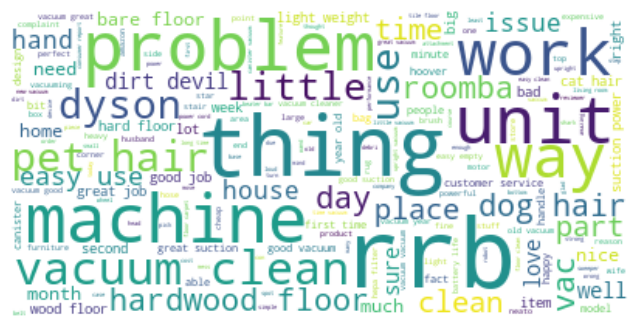

In [56]:
from matplotlib.pyplot import figure

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
figure(figsize= (8,8), dpi= 100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
freq_of_words = pd.Series(' '.join(vacuums['reviews']).split()).value_counts()[:40]
freq_of_words

vacuum        101564
floor          40503
clean          36991
time           32784
good           32444
great          31136
carpet         29887
suction        26252
hair           25841
easy           23096
use            23070
dirt           21989
year           21908
rrb            19922
brush          19808
thing          19749
little         18993
small          18150
dust           18088
dyson          16943
power          16836
attachment     16677
filter         16418
job            16238
product        16182
battery        14772
cord           14762
new            14663
hose           14400
old            13936
month          13847
work           13847
canister       13737
machine        13472
unit           13255
vac            13197
dog            12947
room           12916
light          12799
problem        12664
dtype: int64